In [1]:
_HOLE_BOUND = ((-10, 10), (-10, 10))  # Hole boundary -10 <= x <= 10, -10 <= y <= 10

GRID_SCALE = 1
GRID_RESOLUTION = 2
GRID_W = 60
GRID_BOUND = ((-GRID_W / 2, GRID_W / 2), (-GRID_W / 2, GRID_W / 2))

In [2]:
from src.prediction.etr_model_trainer import etrModelTrainer

model_trainer = etrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_W,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model = model_trainer.get_model()
pca_model = model_trainer.get_pca()

----------------------
| Model Trainer: ETR |
----------------------
----------------------------------------------
| Training set not found, creating a new one |
----------------------------------------------
-----------------------------------------------------------------------------------------------
| Parsing result from c:\Users\eaton\Desktop\Campus\Capstone\capstone_1\model\data\result.csv |
-----------------------------------------------------------------------------------------------
---------------------------
| Getting point data list |
---------------------------
------------------------------------
| PCA optimal founding initialized |
------------------------------------
----------------------------------------------------------------
| Optimal feature count founded: 107 for desired variance: 0.9 |
----------------------------------------------------------------
Reduction input saved to train_input.npy


In [3]:
import numpy as np

res = model_trainer.get_train_set()

if res is not None:
    x, y = res

    test = x[1:2]
    drag = etr_model[0].predict(test)
    avg_temp = etr_model[1].predict(test)
    max_temp = etr_model[2].predict(test)

    print("real: [0.29223466, 372.84985, 452.61221]")
    print("predicted: ", drag, avg_temp, max_temp)
    print("std: to be Supported")

-------------------------------
| Training set found, loading |
-------------------------------
real: [0.29223466, 372.84985, 452.61221]
predicted:  [0.29223466] [372.84985] [452.61221]
std: to be Supported


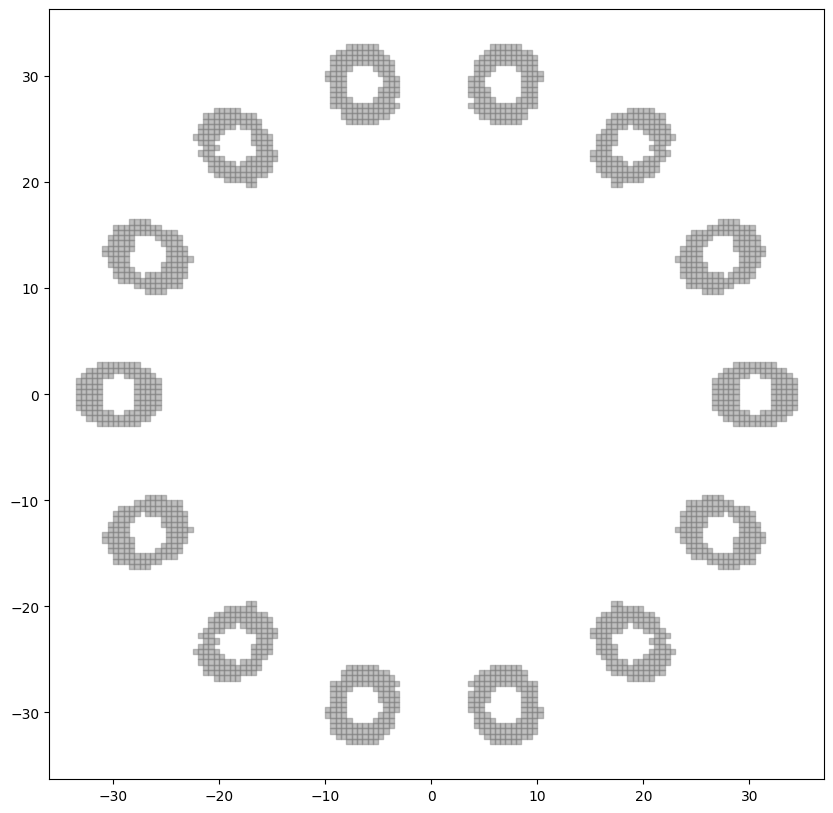

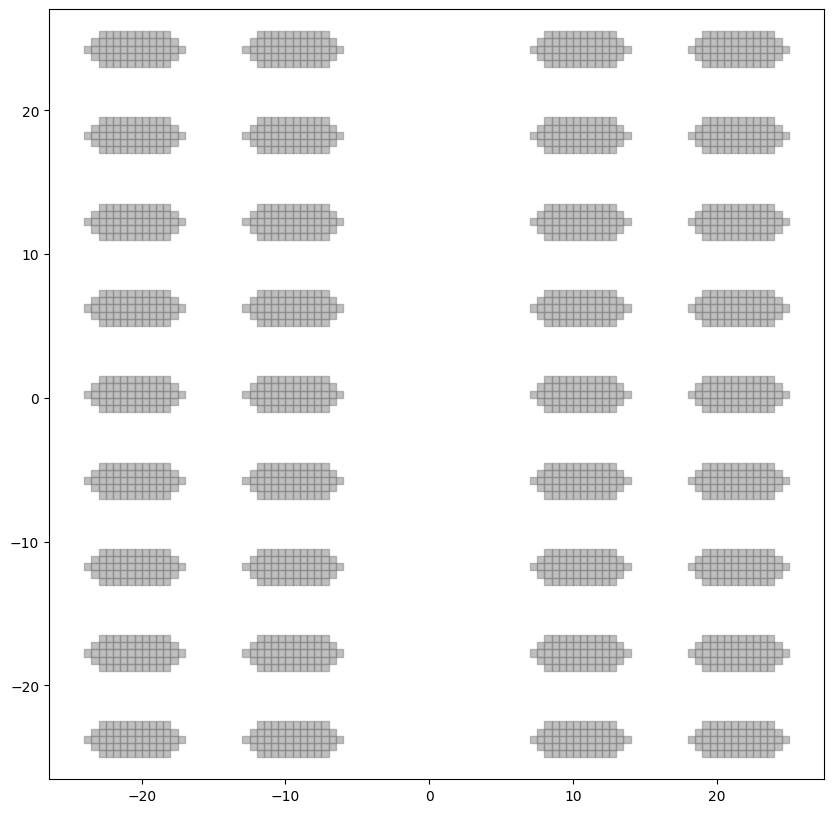

In [4]:
from src.grid.visualize_points import visualize_points
from src.geometry.pattern_unit import (
    PatternUnit,
    Shape,
    PatternTransformation,
    PatternTransformationMatrix,
    Pattern,
)

pattern1 = Pattern(
    pattern_transformation_matrix=PatternTransformationMatrix(
        pattern_unit=PatternUnit(
            Shape(
                w=10,
                h=7.5,
                area_functions=[
                    lambda x, y: x**2 / 16 + y**2 / 9 <= 1
                    and x**2 + y**2 >= 4,  # Donut
                ],
            ),
            k=1 / GRID_RESOLUTION,
        ),
        pattern_transformation=PatternTransformation(
            "circular",
            dx=2.5,
            di=25,
            phi=np.pi / 7,
        ),
        pattern_bound=GRID_BOUND,
    ),
)

visualize_points(
    pattern1.pattern_matrix,
    k=1 / GRID_RESOLUTION,
)

pattern2 = Pattern(
    pattern_transformation_matrix=PatternTransformationMatrix(
        pattern_unit=PatternUnit(
            Shape(
                w=10,
                h=5,
                area_functions=[lambda x, y: x**2 / 9 + y**2 / 2 <= 1],
            ),
            k=1 / GRID_RESOLUTION,
        ),
        pattern_transformation=PatternTransformation(
            "grid",
            dx=10,
            di=10 / 2,
        ),
        pattern_bound=GRID_BOUND,
    ),
)
visualize_points(
    pattern2.pattern_matrix,
    k=1 / GRID_RESOLUTION,
)

In [5]:
from src.prediction.to_model_input import to_model_input

ins = to_model_input(
    pca_model,
    pattern_matrix=pattern1.pattern_matrix,
    bound=GRID_BOUND,
    resolution=1 / GRID_RESOLUTION,
)
ins2 = to_model_input(
    pca_model,
    pattern_matrix=pattern2.pattern_matrix,
    bound=GRID_BOUND,
    resolution=1 / GRID_RESOLUTION,
)
print(ins.shape)
print(ins2.shape)

drag = etr_model[0].predict(ins)
avg_temp = etr_model[1].predict(ins)
max_temp = etr_model[2].predict(ins)

print("ins1 prediction")
print(f"prediction: {drag}, std: ")
print(f"prediction: {avg_temp}, std: ")
print(f"prediction: {max_temp}, std: ")

drag = etr_model[0].predict(ins2)
avg_temp = etr_model[1].predict(ins2)
max_temp = etr_model[2].predict(ins2)
print("ins2 prediction")
print(f"prediction: {drag}, std: ")
print(f"prediction: {avg_temp}, std: ")
print(f"prediction: {max_temp}, std: ")

(1, 107)
(1, 107)
ins1 prediction
prediction: [0.29273883], std: 
prediction: [373.5858422], std: 
prediction: [455.7399026], std: 
ins2 prediction
prediction: [0.29267397], std: 
prediction: [373.4372529], std: 
prediction: [457.278158], std: 
